# Searching the arxiv for helium papers

## First installing the arxiv package.

In [2]:
#installing arxiv
!pip install arxiv==1.3.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=dbbf19b7de3836d01908e01b2f36bcabf7f66295142c9cebf2840d4d5e298d2c
  Stored in directory: /Users/vigneshwarankrishnamurthy/Library/Caches/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


## Before running the code, search http://exoplanet.eu/catalog/all_fields/ and download the csv file and save it as exoplanets.csv. This gives the updated parameters for all exoplanets.

## This code below searches for arxiv and finds the papers that are related to helium. It also removes papers that are not related to helium (example brown dwarf or white dwarf planets)Run this code for finding the paper and store it in a file called step_1_helium_5.csv.
## Do not forget to change the starting date.

In [4]:
#this code reads the arxiv files from the start date and updates the list and stores it in helium_4.csv

import arxiv
import datetime
import re
import csv

# Read exoplanet names from the CSV file
exoplanet_names = set()
with open('exoplanets.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        exoplanet_names.add(row['name'].strip())
        alternate_names = row['alternate_names'].split(',')
        for name in alternate_names:
            exoplanet_names.add(name.strip())

# Define the search query
query = 'cat:astro-ph.EP AND (ti:"helium" OR ti:"He" OR abs:"helium" OR abs:"He" OR ti:"1083" OR ti:"10833" OR abs:"1083" OR abs:"10833")'
start_date = datetime.date(2023, 7, 25) # searched until 2023 Nov 24

# Search for papers
search = arxiv.Search(
    query=query,
    sort_by=arxiv.SortCriterion.SubmittedDate
)
search_results = search.results()

# Filter search results by publication date and keywords
filtered_results = []
for paper in search_results:
    if paper.published.date() < start_date:
        continue
    if any(keyword in paper.title.lower() or keyword in paper.summary.lower() for keyword in ["brown dwarf", "white dwarf"]):
        continue
    filtered_results.append(paper)

# Write the results to a CSV file
with open('step_1_helium_5.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['arXiv ID', 'URL', 'Exoplanet Names Found'])

    for paper in filtered_results:
        arxiv_id = paper.entry_id.split('/')[-1]
        url = f'https://arxiv.org/abs/{arxiv_id}'

        # Find exoplanet names in the title and the abstract
        exoplanet_names_title = {name for name in exoplanet_names if name in paper.title or name.replace(" ", "") in paper.title}
        exoplanet_names_abstract = {name for name in exoplanet_names if name in paper.summary or name.replace(" ", "") in paper.summary}
        exoplanet_names_found = exoplanet_names_title | exoplanet_names_abstract

        # Write the result to the CSV file
        writer.writerow([arxiv_id, url, ', '.join(exoplanet_names_found)])


## Instead of the running the above code, we can run the code below. It not just finds the papers with helium and also stores the type of the study (either simulated or observational- very preliminary results). 
## Do not forget to change the starting date and the saving file name.

In [4]:
#this code reads the arxiv files from the start date and updates the list and stores it in helium_4.csv
# also it removes the papers with brown dwarfs and white dwarfs and categorises them in three types.

import arxiv
import datetime
import re
import csv

# Read exoplanet names from the CSV file
exoplanet_names = set()
with open('exoplanets.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        exoplanet_names.add(row['# name'].strip())
        alternate_names = row['alternate_names'].split(',')
        for name in alternate_names:
            exoplanet_names.add(name.strip())

# Read URLs from the helium_planets_april2023.csv file
helium_planets_urls = set()
with open('helium_planets_april2023.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        urls = row['URL'].split(', ')
        for url in urls:
            helium_planets_urls.add(url.strip())

# Define the search query
query = 'cat:astro-ph.EP AND (ti:"helium" OR ti:"He" OR abs:"helium" OR abs:"He" OR ti:"1083" OR ti:"10833" OR abs:"1083" OR abs:"10833")'
start_date = datetime.date(2023, 1, 1)

# Define the observation and simulation keywords
observation_keywords = ['observation', 'observations', 'observed', 'observing', 'observe']
simulation_keywords = ['model', 'modelled', 'modeling', 'simulations', 'simulation', 'simulate']

# Search for papers
search = arxiv.Search(
    query=query,
    sort_by=arxiv.SortCriterion.SubmittedDate
)
search_results = search.results()

# Filter search results by publication date and keywords
filtered_results = []
for paper in search_results:
    if paper.published.date() < start_date:
        continue
    if any(keyword in paper.title.lower() or keyword in paper.summary.lower() for keyword in ["brown dwarf", "white dwarf"]):
        continue
    filtered_results.append(paper)

# Write the results to a CSV file
with open('step_1_helium_4.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['arXiv ID', 'URL', 'Exoplanet Names Found', 'Type', 'Type2', 'Type3'])

    for paper in filtered_results:
        arxiv_id = paper.entry_id.split('/')[-1]
        url = f'https://arxiv.org/abs/{arxiv_id}'

        # Find exoplanet names in the title and the abstract
        exoplanet_names_title = {name for name in exoplanet_names if name in paper.title or name.replace(" ", "") in paper.title}
        exoplanet_names_abstract = {name for name in exoplanet_names if name in paper.summary or name.replace(" ", "") in paper.summary}
        exoplanet_names_found = exoplanet_names_title | exoplanet_names_abstract

        # Determine the type of paper based on observation and simulation keywords
        type = 'N'
        if any(keyword in paper.title.lower() or keyword in paper.summary.lower() for keyword in observation_keywords):
            type = 'O'
        elif any(keyword in paper.title.lower() or keyword in paper.summary.lower() for keyword in simulation_keywords):
            type = 'S'

        # Determine the type2 of paper based on the presence of exoplanet names, but only if column 3 is filled
        type2 = 'SS'
        if exoplanet_names_found and exoplanet_names_found != set(['']):
            type2 = 'E'

        # Determine the type3 of paper based on the URL comparison
        type3 = 'NO'
        if url in helium_planets_urls:
            type3 = 'HO'

        # Write the result to the CSV file
        writer.writerow([arxiv_id, url, ', '.join(exoplanet_names_found), type, type2, type3])



## The code above also has many false positives that are not helium studies. Hence manually have to check them and shortlist the exact helium observation planets in the files step_2_helium_shortlisted.csv. If you change the name, please change the name in the code below as well.

## The code below read the step_2_helium_shortlisted.csv file and arrange them in planets order (alphabetically) in the file step_3_helium_planets_update.csv

In [5]:
import csv

# read the data from the exoplanets file and store it in a dictionary
exoplanet_data = {}
with open('exoplanets.csv', 'r') as f:
    reader = csv.reader(f)
    # get the header row
    header = next(reader)
    # iterate over the rows in the file
    for row in reader:
        # use the planet name as the key in the dictionary
        planet_name = row[0]
        # get the headers and data for the planet
        planet_headers = header[2:]
        planet_data = row[2:]
        # store the data in a dictionary for the planet
        exoplanet_data[planet_name] = (planet_headers, planet_data)

# create a dictionary to store the planets and corresponding urls
planet_urls = {}

# read the data from the original file
with open('step_2_helium_shortlisted.csv', 'r') as f:
    reader = csv.reader(f)
    # skip the header row
    next(reader)
    # iterate over the rows in the file
    for row in reader:
        # split the planets by comma followed by a space
        planets = [p.strip() for p in row[1].split(',')]
        # iterate over the planets
        for planet in planets:
            # add the planet to the dictionary if it doesn't exist
            if planet not in planet_urls:
                planet_urls[planet] = []
            # add the url to the list of urls for the planet
            planet_urls[planet].append(row[0])

# create a new file to write the data to
with open('step_3_helium_planets_update.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # get the headers from exoplanets.csv and add empty columns for columns 3-8
    planet_headers = ['Planets', 'URL', 'excess_abs', 'excess_abs_min', 'excess_abs_max', 'upp_lim', 'mass_loss', 'mass_loss_min', 'mass_loss_max','mass_loss_upp'] + exoplanet_data[next(iter(exoplanet_data.keys()))][0]
    # write the header row
    writer.writerow(planet_headers)
    # iterate over the planets in alphabetical order
    for planet in sorted(planet_urls.keys()):
        # get the data for the planet from the exoplanet data dictionary
        if planet in exoplanet_data:
            # get the headers and data for the planet
            planet_headers, planet_data = exoplanet_data[planet]
            # create a list of the data for the planet in the correct order
            planet_row = [planet, ', '.join(planet_urls[planet]), '', '', '', '', '', '', '', ''] + planet_data
            # write the row for the planet
            writer.writerow(planet_row)
        else:
            # write a row with the planet and url, leaving the exoplanet data columns empty
            writer.writerow([planet, ', '.join(planet_urls[planet]), '', '', '', '', '', '', '', '', '', '', '', '', '', ''])


## After this add the excess abs, excess abs min and max limits or upper limits in the step_3_helium_planets_for_plots.csv file manually . This is a crucial step. And manually copy these to new row in helium_planets_for_plots.csv or if the planets already exist, manually change the specific columns.

## We will use helium_planets_for_plots.csv to create a different csv file to use for calculations. And we will store the file as helium_planets.csv

In [1]:
import pandas as pd

# Read the original CSV file
input_file = 'helium_planets_for_plots.csv'
df = pd.read_csv(input_file)

# Select the first 10 columns
selected_columns = df.iloc[:, :10]

# Write the selected columns to a new CSV file
output_file = 'helium_planets.csv'
selected_columns.to_csv(output_file, index=False)


## the code below uses the helium_planets_for_plots.csv and plots the required plots.

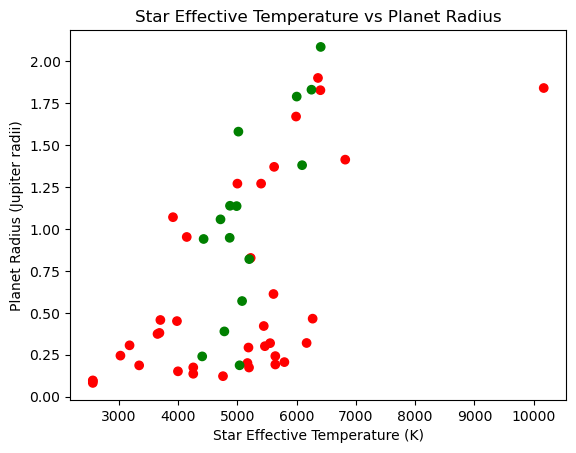

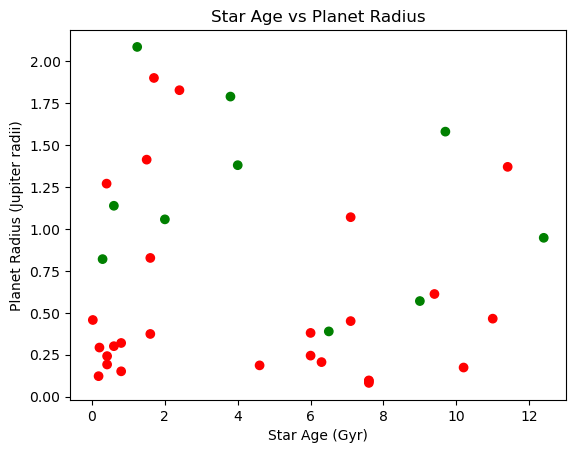

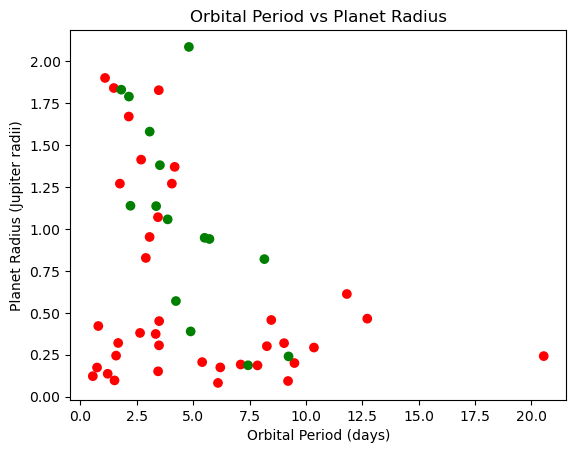

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("helium_planets_for_plots.csv")

# Filter out planets with missing radius or star_teff values
df = df.dropna(subset=["radius", "star_teff"])

# Define the colors for the scatter plots
colors = ["green" if x > 0 else "red" for x in df["excess_abs"]]

# Create the scatter plot for star_teff vs radius
plt.figure()
plt.scatter(df["star_teff"], df["radius"], c=colors)
plt.xlabel("Star Effective Temperature (K)")
plt.ylabel("Planet Radius (Jupiter radii)")
plt.title("Star Effective Temperature vs Planet Radius")

# Create the scatter plot for star_age vs radius
plt.figure()
plt.scatter(df["star_age"], df["radius"], c=colors)
plt.xlabel("Star Age (Gyr)")
plt.ylabel("Planet Radius (Jupiter radii)")
plt.title("Star Age vs Planet Radius")

# Create the scatter plot for orbital_period vs radius
plt.figure()
plt.scatter(df["orbital_period"], df["radius"], c=colors)
plt.xlabel("Orbital Period (days)")
plt.ylabel("Planet Radius (Jupiter radii)")
plt.title("Orbital Period vs Planet Radius")

# Show the plots
plt.show()


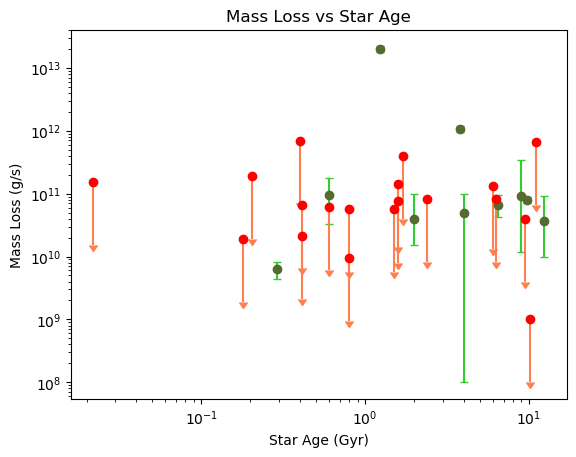

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("helium_planets_for_plots.csv")

# Filter out planets with missing mass_loss or star_age values
df2 = df.dropna(subset=["mass_loss", "star_age"])

# Filter out planets with missing mass_loss_upp or star_age values
df3 = df.dropna(subset=["mass_loss_upp", "star_age"])

# Define the x2 and y2 values for the errorbar plot for mass_loss and star_age
x2 = df2["star_age"]
y2 = df2["mass_loss"]
y2_l = df2["mass_loss_min"]
y2_u = df2["mass_loss_max"]
y2err = [y2_l,y2_u]

# Define the x2 and y2 values for the errorbar plot for mass_loss and star_age
x3 = df3["star_age"]
y3 = df3["mass_loss_upp"]
y3_l = df3["mass_loss_upp"] * 0.9
y3_u = df3["mass_loss_upp"] - df3["mass_loss_upp"]
y3err = [y3_l,y3_u]



# Create the errorbar plot for mass_loss vs star_age
plt.errorbar(x2, y2, yerr=y2err, fmt='o', ecolor='limegreen', capsize=3, c='darkolivegreen')
plt.errorbar(x3, y3, yerr=y3err, fmt='o', ecolor='coral', capsize=3, uplims = True, c='red')

plt.xlabel("Star Age (Gyr)")
plt.ylabel("Mass Loss (g/s)")
plt.title("Mass Loss vs Star Age")
plt.yscale('log')
plt.xscale('log')
# Show the plot
plt.show()


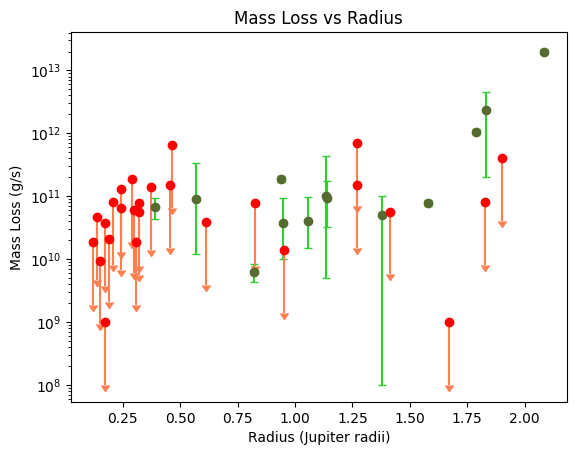

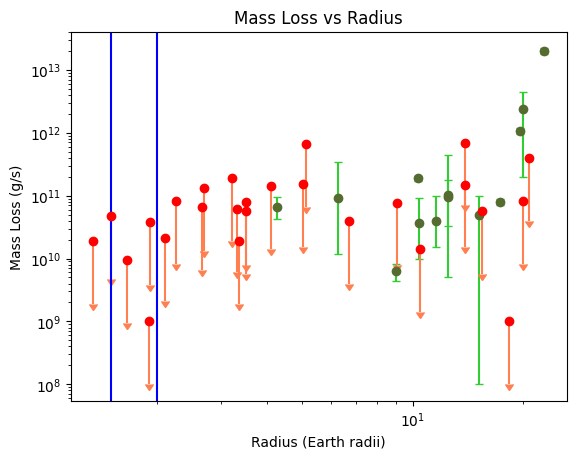

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("helium_planets_for_plots.csv")

# Filter out planets with missing mass_loss or star_age values
df2 = df.dropna(subset=["mass_loss", "radius"])

# Filter out planets with missing mass_loss_upp or star_age values
df3 = df.dropna(subset=["mass_loss_upp", "radius"])

# Define the x2 and y2 values for the errorbar plot for mass_loss and star_age
x2 = df2["radius"]
y2 = df2["mass_loss"]
y2_l = df2["mass_loss_min"]
y2_u = df2["mass_loss_max"]
y2err = [y2_l,y2_u]

# Define the x2 and y2 values for the errorbar plot for mass_loss and star_age
x3 = df3["radius"]
y3 = df3["mass_loss_upp"]
y3_l = df3["mass_loss_upp"] * 0.9
y3_u = df3["mass_loss_upp"] - df3["mass_loss_upp"]
y3err = [y3_l,y3_u]



# Create the errorbar plot for mass_loss vs radius (Jupiter) 
plt.errorbar(x2, y2, yerr=y2err, fmt='o', ecolor='limegreen', capsize=3, c='darkolivegreen')
plt.errorbar(x3, y3, yerr=y3err, fmt='o', ecolor='coral', capsize=3, uplims = True, c='red')
plt.xlabel("Radius (Jupiter radii)")
plt.ylabel("Mass Loss (g/s)")
plt.title("Mass Loss vs Radius")
plt.yscale('log')
#Show the plot
plt.show()

# Create the errorbar plot for mass_loss vs radius (Earth) 
plt.errorbar(x2 * 10.973, y2, yerr=y2err, fmt='o', ecolor='limegreen', capsize=3, c='darkolivegreen')
plt.errorbar(x3 * 10.973, y3, yerr=y3err, fmt='o', ecolor='coral', capsize=3, uplims = True, c='red')
# Add a vertical line at radius gap and neptunian desert boundary
plt.axvline(x=1.5, color='blue')
plt.axvline(x=2, color='blue')
plt.xlabel("Radius (Earth radii)")
plt.ylabel("Mass Loss (g/s)")
plt.title("Mass Loss vs Radius")
plt.yscale('log')
plt.xscale('log')

#Show the plot
plt.show()


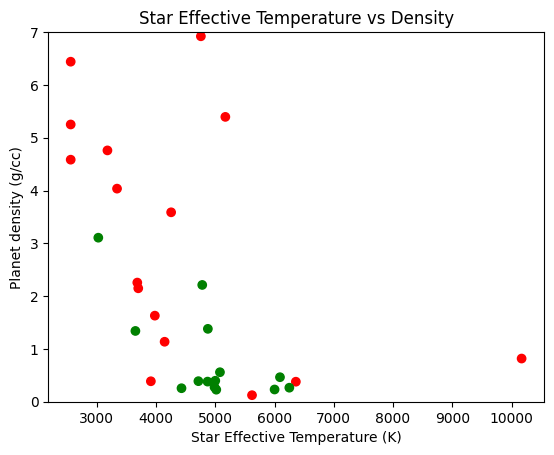

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("helium_planets_for_plots_with_density.csv")

# Filter out planets with missing radius or star_teff values
df = df.dropna(subset=["density", "star_teff"])

# Define the colors for the scatter plots
colors = ["green" if x > 0 else "red" for x in df["excess_abs"]]

# Create the scatter plot for star_teff vs radius
plt.figure()
plt.scatter(df["star_teff"],df["density"]*1.33, c=colors)
plt.xlabel("Star Effective Temperature (K)")
plt.ylabel("Planet density (g/cc)")
plt.ylim(0,7)
plt.title("Star Effective Temperature vs Density")
plt.show()

/var/folders/y7/7yql_w4n62zbx9thr6frbrrr0000gn/T/ipykernel_51783/2675044081.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,7)


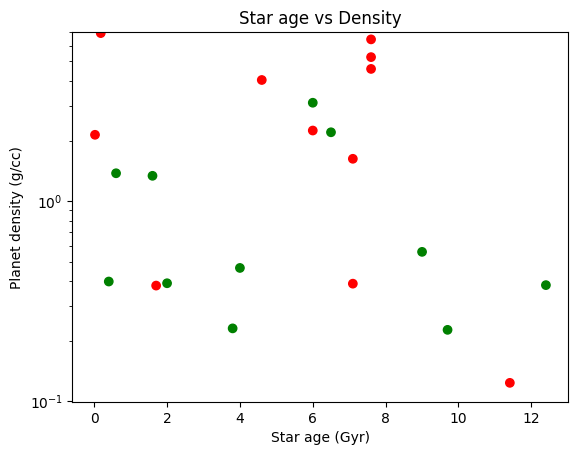

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("helium_planets_for_plots_with_density.csv")

# Filter out planets with missing radius or star_teff values
df = df.dropna(subset=["density", "star_age"])

# Define the colors for the scatter plots
colors = ["green" if x > 0 else "red" for x in df["excess_abs"]]

# Create the scatter plot for star_teff vs radius
plt.figure()
plt.scatter(df["star_age"],df["density"]*1.33, c=colors)
plt.xlabel("Star age (Gyr)")
plt.ylabel("Planet density (g/cc)")
plt.yscale('log')
plt.ylim(0,7)
plt.title("Star age vs Density")
plt.show()